<a href="https://colab.research.google.com/github/Senuth-Per/ML_Coursework_Banking_Systerm/blob/main/Ml_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset with the proper delimiter (semicolon)
data_full_additional = pd.read_csv('/content/drive/MyDrive/ML_CW/Colab Notebooks/bank-additional-full - Copy.csv', delimiter=';')

# Step 1: Remove duplicates
print(f"Initial dataset shape: {data_full_additional.shape}")
data_full_additional = data_full_additional.drop_duplicates()
print(f"Shape after removing duplicates: {data_full_additional.shape}")

# Step 2: Handle "unknown" values in categorical features
categorical_cols = [
    'job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact', 'month', 'day_of_week', 'poutcome'
]

# Add binary flag columns to indicate "unknown" values
for col in categorical_cols:
    if data_full_additional[col].str.contains('unknown').any():
        data_full_additional[f'is_unknown_{col}'] = (data_full_additional[col] == 'unknown').astype(int)

# Replace "unknown" with NaN for imputation
data_full_additional[categorical_cols] = data_full_additional[categorical_cols].replace('unknown', np.nan)

# Step 3: Handle missing values
# Impute categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
data_full_additional[categorical_cols] = cat_imputer.fit_transform(data_full_additional[categorical_cols])

# Step 4: One-hot encoding for non-ordinal categorical variables
non_ordinal_cols = ['job', 'marital', 'contact', 'poutcome', 'month', 'day_of_week']
data_full_additional = pd.get_dummies(data_full_additional, columns=non_ordinal_cols, drop_first=True)

# Step 5: Map ordinal categorical variables
education_mapping = {
    'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4,
    'illiterate': 5, 'professional.course': 6, 'university.degree': 7
}
default_mapping = {'no': 0, 'yes': 1}
housing_mapping = {'no': 0, 'yes': 1}
loan_mapping = {'no': 0, 'yes': 1}

data_full_additional['education'] = data_full_additional['education'].map(education_mapping)
data_full_additional['default'] = data_full_additional['default'].map(default_mapping)
data_full_additional['housing'] = data_full_additional['housing'].map(housing_mapping)
data_full_additional['loan'] = data_full_additional['loan'].map(loan_mapping)

# Step 6: Exclude the 'duration' feature for realistic predictive modeling
data_full_additional = data_full_additional.drop(columns=['duration'])

# Step 7: Scale numerical features
numerical_cols = [
    'age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]
scaler = StandardScaler()
data_full_additional[numerical_cols] = scaler.fit_transform(data_full_additional[numerical_cols])

# Step 8: Target encoding
# Encode the target variable (y)
data_full_additional['y'] = data_full_additional['y'].map({'yes': 1, 'no': 0})

# Step 9: Add derived features from numerical data
data_full_additional['interaction_emp_cons'] = data_full_additional['emp.var.rate'] * data_full_additional['cons.price.idx']
data_full_additional['interaction_nr_employed_conf'] = data_full_additional['nr.employed'] * data_full_additional['cons.conf.idx']

# Step 10: Split features and target variable
X_full_additional = data_full_additional.drop(columns=['y'])
y_full_additional = data_full_additional['y']

# Step 11: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_full_additional, y_full_additional, test_size=0.2, random_state=42
)

# Save the entire preprocessed dataset
processed_data_path = '/content/drive/MyDrive/banking_system/pre_processed_data.csv'
data_full_additional.to_csv(processed_data_path, index=False)
print(f"Preprocessed dataset saved to {processed_data_path}")

# Display dataset shapes
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Initial dataset shape: (41188, 21)
Shape after removing duplicates: (41176, 21)
Preprocessed dataset saved to /content/drive/MyDrive/banking_system/pre_processed_data.csv
Training data shape: (32940, 49)
Testing data shape: (8236, 49)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load preprocessed dataset
data_path = '/content/drive/MyDrive/banking_system/pre_processed_data.csv'
data = pd.read_csv(data_path)

# Split features and target variable
X = data.drop(columns=['y'])
y = data['y']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8932 - loss: 0.3162 - val_accuracy: 0.8921 - val_loss: 0.2862
Epoch 2/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8994 - loss: 0.2711 - val_accuracy: 0.8947 - val_loss: 0.2831
Epoch 3/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9071 - loss: 0.2614 - val_accuracy: 0.8936 - val_loss: 0.2841
Epoch 4/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9017 - loss: 0.2690 - val_accuracy: 0.8940 - val_loss: 0.2823
Epoch 5/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9075 - loss: 0.2572 - val_accuracy: 0.8954 - val_loss: 0.2837
Epoch 6/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9073 - loss: 0.2568 - val_accuracy: 0.8950 - val_loss: 0.2835
Epoch 7/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9087 - loss: 0.2557 - val_accuracy: 0.8957 - val_loss: 0.2835
Epoch 8/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.2577 - val_accuracy: 0.

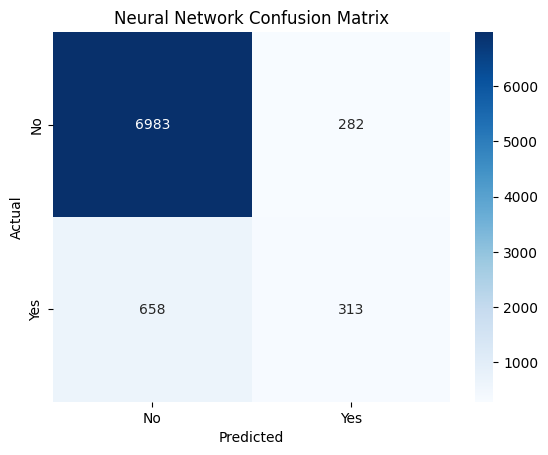

In [ ]:
# Neural Network Implementation
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Neural Network
nn_history = nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate Neural Network
nn_y_pred_prob = nn_model.predict(X_test)
nn_y_pred = (nn_y_pred_prob > 0.5).astype(int).flatten()
nn_roc_auc = roc_auc_score(y_test, nn_y_pred_prob)

print("Neural Network Performance:")
print(classification_report(y_test, nn_y_pred))
print(f"ROC-AUC: {nn_roc_auc:.4f}")

# Confusion Matrix for Neural Network
nn_cm = confusion_matrix(y_test, nn_y_pred)
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7265
           1       0.53      0.28      0.37       971

    accuracy                           0.89      8236
   macro avg       0.72      0.62      0.65      8236
weighted avg       0.87      0.89      0.87      8236

ROC-AUC: 0.7702


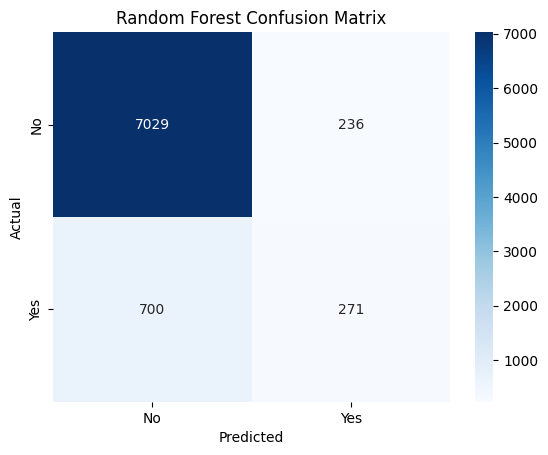

In [ ]:
# Random Forest Implementation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
rf_y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
rf_y_pred = rf_model.predict(X_test)
rf_roc_auc = roc_auc_score(y_test, rf_y_pred_prob)

print("Random Forest Performance:")
print(classification_report(y_test, rf_y_pred))
print(f"ROC-AUC: {rf_roc_auc:.4f}")

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


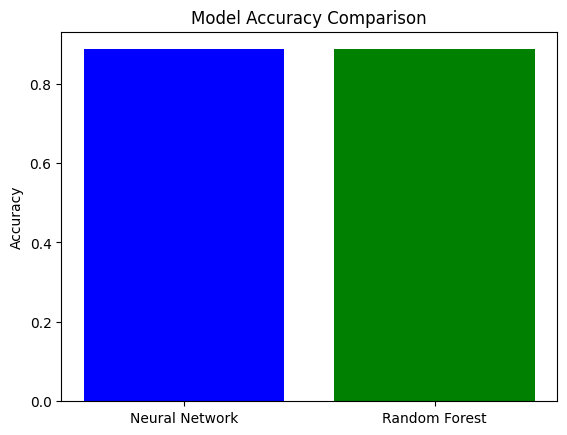

In [ ]:
# Compare Accuracy Rates
nn_accuracy = (nn_cm[0, 0] + nn_cm[1, 1]) / np.sum(nn_cm)
rf_accuracy = (rf_cm[0, 0] + rf_cm[1, 1]) / np.sum(rf_cm)

plt.bar(['Neural Network', 'Random Forest'], [nn_accuracy, rf_accuracy], color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

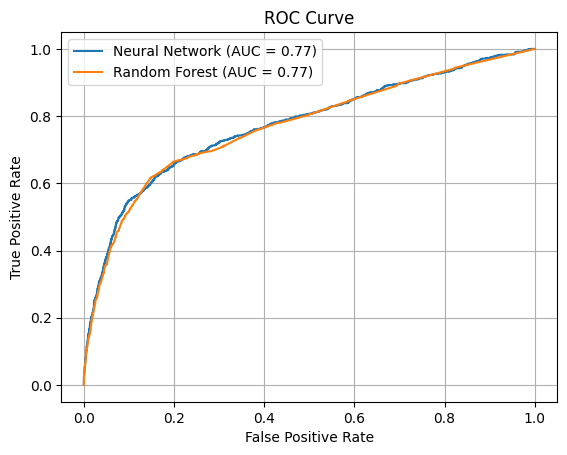

Comparison of Models:
Neural Network AUC: 0.7741
Random Forest AUC: 0.7702


In [ ]:
# ROC Curve
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_y_pred_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred_prob)

plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# Compare Models
print("Comparison of Models:")
print(f"Neural Network AUC: {nn_roc_auc:.4f}")
print(f"Random Forest AUC: {rf_roc_auc:.4f}")